In [107]:
# If using Google Colab, install the dependencies
# !pip install --upgrade numpy scipy matplotlib pandas seaborn scikit-learn umap-learn

In [108]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data loading & exploration
We will use the Iris dataset, starting by loading data from sklearn and running some visualization.

In [109]:
from sklearn.datasets import load_iris
iris = load_iris()
df_iris_X, df_iris_y = load_iris(return_X_y=True, as_frame=True)
X, y = iris.data, iris.target

In [110]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [111]:
# for plotting
colors_dict = {0: "tab:blue", 1: "tab:orange", 2: "tab:green"}
y_colors = [colors_dict[_] for _ in y]

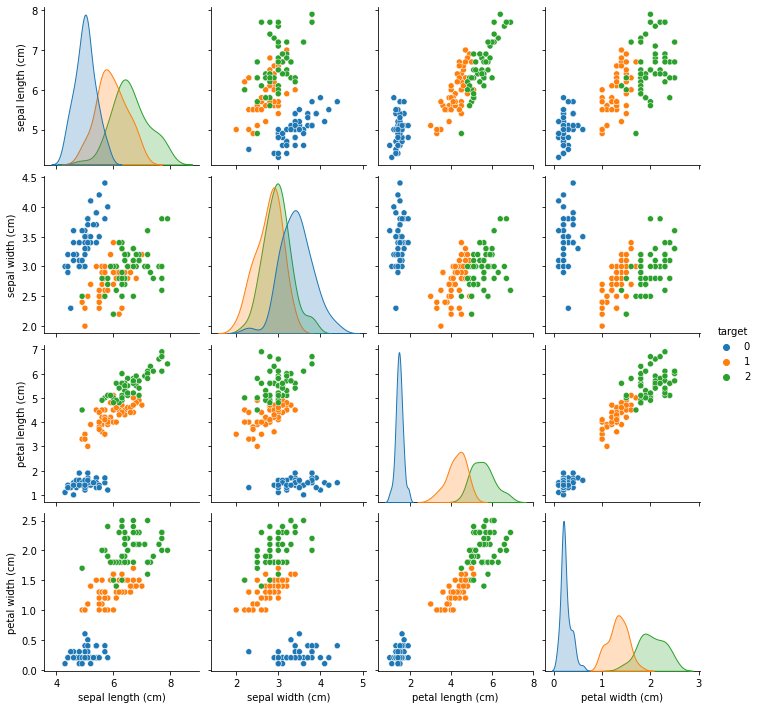

In [112]:
sns.pairplot(pd.concat([df_iris_X, df_iris_y], axis=1), hue="target", palette="tab10")

## PCA

### A minimal example for PCA

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# normalize
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# doing the PCA
pca = PCA(svd_solver='full')
pca.fit(X_norm)

# transformed features
X_pred = pca.transform(X_norm)

### Looking at outputs

In [114]:
print(f"{X_norm.shape}")
print(f"{X_pred.shape}")
print(f"{pca.components_.shape}")
print(f"{pca.singular_values_.shape}")
print(f"{pca.explained_variance_.shape}")
print(f"{pca.explained_variance_ratio_.shape}")

(150, 4)
(150, 4)
(4, 4)
(4,)
(4,)
(4,)


In [115]:
# [n_components, n_features]
pca.components_[:2, :]

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [116]:
pca.singular_values_ @ pca.components_

array([11.48486092,  6.53976705, 14.51037486, 14.65532115])

In [117]:
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [118]:
print(X_norm[0, :])
print(X_pred[0, :])

[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]


In [119]:
# 0.52106591 * sepal length + -0.26934744 * sepal width ...
# + 0.5804131 * petal length +  0.56485654 * petal width
print(pca.components_[0, :] @ X_norm[0, :])
print(pca.components_ @ X_norm[0, :])

-2.26470280880759
[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]


### Visualize the results

[Text(0.5, 0, 'PC1'), Text(0, 0.5, 'PC2')]

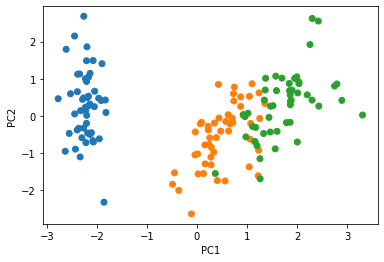

In [120]:
fig, ax = plt.subplots()
ax.scatter(X_pred[:, 0], X_pred[:, 1], c=y_colors)
ax.set(xlabel="PC1", ylabel="PC2")

### Selecting number of components

[Text(0.5, 0, 'number of components'), Text(0, 0.5, 'explained variance')]

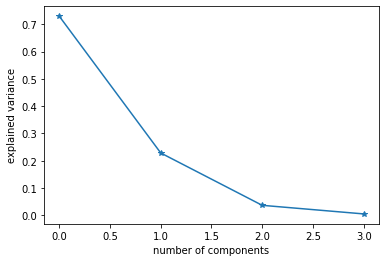

In [121]:
fig, ax = plt.subplots()
ax.plot(pca.explained_variance_ratio_, "-*")
ax.set(xlabel="number of components", ylabel="explained variance")

[Text(0.5, 0, 'number of components'),
 Text(0, 0.5, 'cumulative explained variance')]

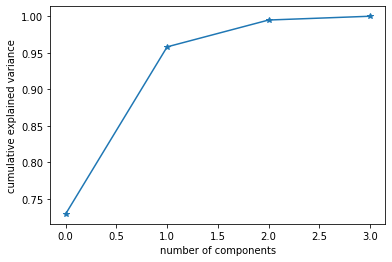

In [122]:
fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_), "-*")
ax.set(xlabel="number of components", ylabel="cumulative explained variance")

### Correspondence with SVD (optional)

In [123]:
from numpy.linalg import svd
from sklearn.utils.extmath import svd_flip
u, s, vh = svd(X_norm, full_matrices=False)
u, vh = svd_flip(u, vh)

In [124]:
# this explains svd
np.allclose(X_norm, u @ np.diag(s) @ vh)

True

In [125]:
vh

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [126]:
print(pca.explained_variance_)
print(f"{s**2 / (X_norm.shape[0]-1)}")

[2.93808505 0.9201649  0.14774182 0.02085386]
[2.93808505 0.9201649  0.14774182 0.02085386]


In [127]:
print(pca.explained_variance_ratio_)
print(f"{s**2 / (s**2).sum()}")

[0.72962445 0.22850762 0.03668922 0.00517871]
[0.72962445 0.22850762 0.03668922 0.00517871]


In [128]:
print((X_norm @ vh.T)[0, :])
print((u @ np.diag(s))[0, :])

[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]


### Correspondence with eigen decomposition (optional)

In [129]:
from numpy.linalg import eig
eig_val_v, eig_vec_v = eig(X_norm.T @ X_norm)
eig_val_u, eig_vec_u = eig(X_norm @ X_norm.T)

In [130]:
print(f"{eig_val_v.shape}")
print(f"{eig_vec_v.shape}")

(4,)
(4, 4)


## FA

### A minimal example for FA (with/without rotation)

In [131]:
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=2)
fa.fit(X_norm)
X_fa = fa.transform(X_norm)

In [132]:
fa_rot = FactorAnalysis(n_components=2, rotation='varimax')
fa_rot.fit(X_norm)
X_fa_rot = fa_rot.transform(X_norm)

### Visualize the results

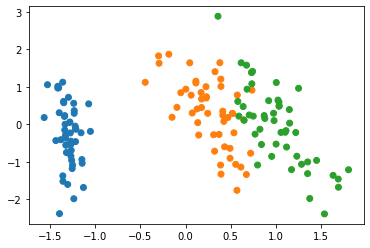

In [133]:
fig, ax = plt.subplots()
ax.scatter(X_fa[:, 0], X_fa[:, 1], c=y_colors)

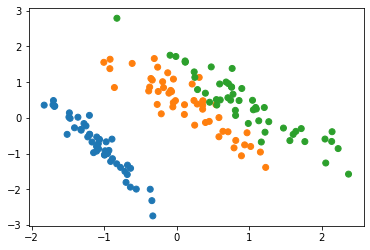

In [134]:
fig, ax = plt.subplots()
ax.scatter(X_fa_rot[:, 0], X_fa_rot[:, 1], c=y_colors)

### Compare between results

In [135]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [136]:
fa.components_

array([[ 0.88096009, -0.41691605,  0.99918858,  0.96228895],
       [-0.4472869 , -0.55390036,  0.01915283,  0.05840206]])

In [137]:
fa_rot.components_

array([[ 0.98633022, -0.16052385,  0.90809432,  0.85857475],
       [-0.05752333, -0.67443065,  0.41726413,  0.43847489]])